In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Esse notebook tem o objetivo de implementar o TSMOM do  Moskowitz. Portanto utilizarei uma parte do dataset, para facilitar a implementação. No dataset estão presentes apenas os preços de fechamento, e apenas de 1999 a 2019.

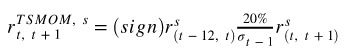
Em resumo a equação final do TSMOM do Moskowitz tem 3 partes: O cálculo do momento do ativo, A poderação do peso no portifolio, e a predição do retorno do ativo

Cálculo do Momento: Calcula-se o retorno do periodo desejado (no caso da image os ultimos 12 meses), e com o retorno e mãos retira-se o sinal, tomando assim uma posição de vendido ou comprado.

O peso no portifolio: Dependendo do periodo utiliza-se uma das seguintes ponderações: 20,40,60,120. E divide-se pelo desvio padrão da carteira
Um possivel melhora no algoritmo é utilizar o desvio padrão de cada ativo em suas respectivas ponderações

Predição do retorno: --

In [2]:
# Importação do csv previamente limpo
df = pd.read_csv ("/home/leme/Documents/Giants Project/close_clean_data.csv")

In [3]:
df.head()

,date,AN,BN,CC,CN,CT,DA,DX,EC,EN,...,ZW,ZZ,DT,HS,LX,ND,NK,SP,UB,AX
0,1999-06-21,42.81,143.90,2468.0,67.537,220.54,20.06,112.848,88.1480,3054.57,...,4614.72,163.364,75.10,11237.36,5618.6,2999.78,16474.0,1464.92,82.26,7704.9
1,1999-06-22,43.12,143.72,2421.0,67.537,222.69,20.20,113.002,88.1247,2984.70,...,4536.94,166.007,74.87,11138.79,5586.4,2931.16,16387.0,1453.39,82.11,7702.8
2,1999-06-23,43.39,142.89,2304.0,67.507,220.19,20.26,113.057,88.1060,3006.66,...,4558.54,165.846,74.47,11119.07,5536.9,2952.72,16262.0,1445.85,81.88,7601.4
3,1999-06-24,43.42,143.63,2227.0,67.497,222.81,20.29,112.419,88.0781,2952.09,...,4528.30,162.323,73.86,10914.04,5466.2,2899.13,16225.0,1435.62,81.59,7486.8
4,1999-06-25,43.64,143.52,2221.0,67.824,221.30,20.42,112.144,88.0781,2948.10,...,4562.87,162.963,74.17,10921.93,5478.0,2894.88,16229.0,1431.52,81.66,7511.3


In [4]:
# Calculo dos retornos percentuais e indexacao da data
returns_daily = df.drop('date', axis=1).pct_change().drop(0)
returns_daily.index = pd.to_datetime(df['date'], format='%Y-%m-%d').drop(0)

# Construção da matrix com os retornos mensais
returns_monthly = returns_daily.resample('BM').last().ffill()
returns_monthly = pd.DataFrame(returns_monthly)

In [5]:
# Calculo dos desvio, e os pesos dos tickers no portifolio
std = returns_daily.std()
weights = std / sum(std)

In [6]:
# Calculo do retorno dos ultimos 12 meses
momentum_12 = returns_monthly.pct_change(12).dropna()
momentum_12.head()

,AN,BN,CC,CN,CT,DA,DX,EC,EN,ES,...,ZW,ZZ,DT,HS,LX,ND,NK,SP,UB,AX
date,,,,,,,,,,,,,,,,,,,,,
2000-06-30,-1.680042,-1.811693,-0.797467,-0.808632,-4.360705,-6.372901,-1.132372,-1.000000,0.602408,-0.627631,...,-25.985148,-0.649937,-4.191946,-0.800082,-6.135108,0.597250,-4.053781,-0.624133,-1.787995,-1.376460
2000-07-31,-8.782214,-2.282773,0.203206,-8.627722,-0.064559,-1.700117,1.281336,-0.388959,-7.584123,-1.366401,...,-1.290715,-1.411241,-1.089036,-1.715257,-1.074258,-7.736787,-3.098812,-1.361246,-1.126274,0.034466
2000-08-31,-0.609374,-1.480958,-1.368204,-2.086222,2.075433,0.310647,-1.380485,-2.010555,-6.517319,-1.498809,...,0.538345,-0.321976,-1.014283,-0.727230,-1.480706,-6.514284,-1.938182,-1.496123,-1.202646,-1.363685
2000-09-29,-45.270248,4.854783,-1.503512,0.363501,-1.000000,-1.000000,-0.431185,0.497687,-5.408469,-2.057020,...,-1.741660,-2.254533,-0.622796,-5.145860,0.975530,-5.407979,-1.788005,-2.056411,-0.546355,-5.152211
2000-10-31,-0.669017,-1.535852,-1.386382,1.632666,2.503416,0.205151,0.690374,-1.000000,0.696411,0.067118,...,-0.496947,-0.330613,-0.968885,-0.774424,-0.426710,0.696447,-0.143663,0.067104,-1.159359,1.054914


In [129]:
ret = 1
for i in range(len(r_final)):
    ret = ret * r_final[i]
(1-ret)*100

9.965108602420969

In [171]:
from sklearn.linear_model import LinearRegression
d = 27

columns = returns_monthly.drop('order', axis=1).columns
dates = []
for i in range(len(returns_monthly)):
    dates.append(i+1)

returns_monthly['order']  = dates

target = returns_monthly[:d].drop('order', axis=1)
train = pd.DataFrame(dates[:d])

date_predict = pd.DataFrame([d+1])

model = LinearRegression()

predict = []
for i in columns:
    rl.fit(train, target.loc[:,i])
    predict.append(rl.predict(date_predict))

Final return:  [-0.16090299]


In [170]:
r_final = []
for i in range(1):
    position = []
    for value in momentum_12.iloc[d]:
        if value > 0:
            position.append(1)
        else:
            position.append(-1)

    position = np.array(position)

    r_t1 = predict

    r_final.append(1 + np.dot(position * weights, r_t1 ))
    
print('Final return: ', (r_final[0]- 1)*100)

Final return:  [-0.16090299]


In [189]:
import xgboost as xgb

r_final = []
for d in range(12,161):
    columns = returns_monthly.drop('order', axis=1).columns
    dates = []
    for i in range(len(returns_monthly)):
        dates.append(i+1)

    returns_monthly['order']  = dates

    target = returns_monthly[:d].drop('order', axis=1)
    train = pd.DataFrame(dates[:d])

    date_predict = pd.DataFrame([d+1])

    model = LinearRegression()

    predict = []
    for i in columns:
        rl.fit(train, target.loc[:,i])
        predict.append(rl.predict(date_predict))


    
    for i in range(1):
        position = []
        for value in momentum_12.iloc[d]:
            if value > 0:
                position.append(1)
            else:
                position.append(-1)

        position = np.array(position)

        r_t1 = predict

        r_final.append(1 + np.dot(position * weights, r_t1 ))

r_final

ModuleNotFoundError: No module named 'xgboost'

In [181]:
r = 1
for i in r_final:
    r = r * i
r-1

array([-0.12896278])

In [190]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'